<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contribuyentes:" data-toc-modified-id="Contribuyentes:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contribuyentes:</a></span></li><li><span><a href="#Donaciones:" data-toc-modified-id="Donaciones:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Donaciones:</a></span></li></ul></div>

# Oxfam Intermon

In [1]:
#Impotando Numpy:
import numpy as np
#Importando Pandas:
import pandas as pd
#Importando Matplotlib:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#omitir alertas
import warnings
warnings.filterwarnings('ignore')

## Contribuyentes: 

Para ahorrar tiempo, si existe columnas de fechas, es recomendable usar la opción **`parse_dates`** para definir rápidamente el datatime.  


In [3]:
account= pd.read_csv('account_id_data.csv', parse_dates=['date_of_birth','original_recruitment_date'])

In [4]:
#Averiguando las primeras características:
account.dtypes

account_id                            int64
date_of_birth                datetime64[ns]
original_recruitment_date    datetime64[ns]
recruitment_channel                  object
gender                               object
dtype: object

In [5]:
account.iloc[np.random.randint(0,account.shape[0],10),:]

,account_id,date_of_birth,original_recruitment_date,recruitment_channel,gender
2415,3419639,NaT,2001-04-18,llamada,hombre
6041,4092421,1981-12-13,2008-01-29,web,mujer
3109,3546966,1969-03-13,2002-02-04,apartado_correos,mujer
1122,3203020,1962-04-07,2001-04-06,apartado_correos,hombre
1816,3309147,1967-03-04,1999-10-28,apartado_correos,mujer
1101,3199053,1952-08-08,2006-06-06,puerta_a_puerta,mujer
8706,4452727,1978-04-05,2015-09-24,puerta_a_puerta,mujer
991,3179620,1936-03-08,2004-06-03,apartado_correos,mujer
3516,3606288,1976-10-10,2005-05-02,apartado_correos,mujer
5308,3971592,1972-02-23,2007-03-01,web,mujer


Chequeando si hay valores nulos:

In [6]:
account.isnull().any()

account_id                   False
date_of_birth                 True
original_recruitment_date     True
recruitment_channel          False
gender                       False
dtype: bool

Solo existen valores nulos en las columnas: **`date_of_birth`** y **`original_recruitment_date`**

## Donaciones: 

In [7]:
gifts= pd.read_csv('gifts.csv',parse_dates=['payment_date'])

In [8]:
gifts.dtypes

gift_id                    int64
account_id                 int64
payment_date      datetime64[ns]
payment_amount           float64
gift_type                 object
frequency                 object
dtype: object

In [9]:
gifts.iloc[np.random.randint(0,gifts.shape[0],10),:]

,gift_id,account_id,payment_date,payment_amount,gift_type,frequency
13033,27218143,3812757,2016-02-01,10.0,Cuotas,Mensual
42883,27802378,3406404,2016-06-01,10.0,Cuotas,Mensual
83690,28320862,4302361,2016-10-02,12.0,Cuotas,Mensual
98460,28583206,3636986,2016-12-01,15.0,Cuotas,Mensual
24996,27514475,3705773,2016-04-01,10.0,Cuotas,Mensual
100317,28616567,3560205,2016-12-01,40.0,Cuotas,Mensual
26220,27477902,3643521,2016-04-01,18.0,Cuotas,Mensual
75702,28231369,3846721,2016-09-02,10.0,Cuotas,Mensual
27515,27450927,4328188,2016-04-01,15.0,Cuotas,Mensual
78414,28304647,4330512,2016-10-01,16.0,Cuotas,Mensual


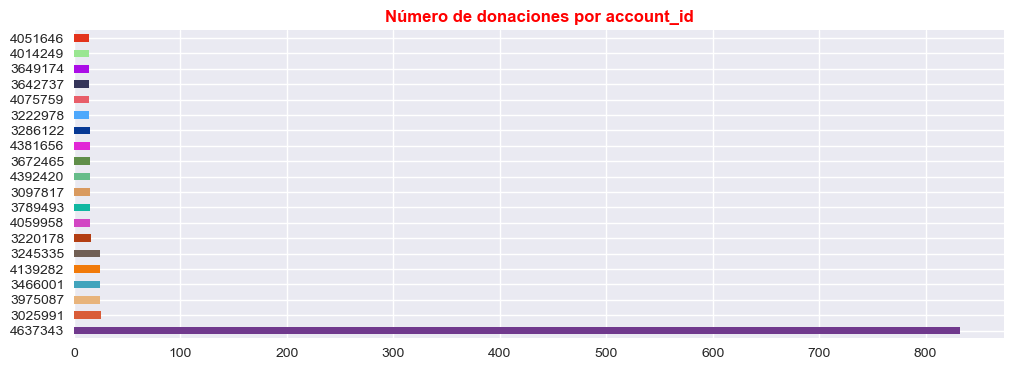

In [10]:
colores=[]
for i in range(20):
    color=(np.random.random(),np.random.random(),np.random.random())
    colores.append(color)
titulo="Número de donaciones por account_id"
gifts.account_id.value_counts().head(20).plot.barh(figsize=(12,4),color=colores)
plt.title(titulo,fontweight= 'bold',color="red")
plt.show()

*Un apunte de cómo usar la opción format en datatime.*

```Python
gifts['payment_date']= pd.to_datetime(gifts['payment_date'],format='%Y-%m-%d') 
```

1. **¿En qué mes de 2016 se realizaron más donativos puntuales?¿Y cuál fue el importe medio de estos donativos en ese mes?**

In [11]:
#Agregando la columna "año" y "mes" a la tabla gifts:
gifts= gifts.assign(
    año= gifts['payment_date'].dt.year,
    mes= gifts['payment_date'].dt.month
)

In [12]:
#Cerciorando que la tabla esta configurada como esperamos:
gifts.iloc[np.random.randint(0,gifts.shape[0],10),:]

,gift_id,account_id,payment_date,payment_amount,gift_type,frequency,año,mes
3494,27114798,3282866,2016-01-01,10.0,Cuotas,Mensual,2016,1
40378,27598833,3136465,2016-05-01,30.0,Cuotas,Mensual,2016,5
24918,27505634,3685266,2016-04-01,10.0,Cuotas,Mensual,2016,4
16824,27356736,3421091,2016-03-01,10.0,Cuotas,Mensual,2016,3
49635,27728941,4486376,2016-06-01,15.0,Cuotas,Mensual,2016,6
17205,27362763,4396109,2016-03-01,10.0,Cuotas,Mensual,2016,3
54438,27915138,3987174,2016-07-02,7.0,Cuotas,Mensual,2016,7
69076,28246997,3838878,2016-09-01,5.0,Cuotas,Mensual,2016,9
75761,28237936,4193629,2016-09-02,18.0,Cuotas,Mensual,2016,9
57352,27987591,3490199,2016-07-02,12.0,Cuotas,Mensual,2016,7


Viendo si sólo regrista la columna `"año"` a 2016 y los tipos de gifts:

In [13]:
gifts.año.unique()

array([2016], dtype=int64)

In [14]:
gifts.gift_type.value_counts()

Cuotas     100996
Puntual      1555
Name: gift_type, dtype: int64

Quiero saber si existen valores nulos:

In [15]:
gifts.isnull().any()

gift_id           False
account_id        False
payment_date      False
payment_amount    False
gift_type         False
frequency          True
año               False
mes               False
dtype: bool

Sólo existen valores nulos en la columna `frequency`. Por tanto, ello no interfiere en la pregunta

In [16]:
#Haciendo un group by:
agrup_maxdon =gifts.groupby('mes',as_index=False).agg({'account_id':'count','payment_amount':'mean'})
agrup_maxdon

,mes,account_id,payment_amount
0,1,8188,18.983955
1,2,8126,18.102645
2,3,8276,17.325123
3,4,9114,16.184320
4,5,8691,17.510305
5,6,8643,18.456946
6,7,8696,17.650336
7,8,8543,17.207552
8,9,8568,17.504718
9,10,8611,17.731632


In [17]:
#Seleccionado el mes con mayores donaciones yla donación media:
agrup_maxdon[agrup_maxdon['account_id']== max(agrup_maxdon['account_id'])]

,mes,account_id,payment_amount
3,4,9114,16.18432


2. **¿Cuál es la antigüedad de los colaboradores en el 3r cuartil (75%muestra)?<br>¿Es mayor para los hombres o para las mujeres?(No tener en cuenta *NA*, calcular antigüedad desde *“2016-12-31”*)**

In [18]:
account.original_recruitment_date.astype('int64').quantile([.75]).astype('datetime64[ns]')

0.75   2013-07-30
Name: original_recruitment_date, dtype: datetime64[ns]

In [19]:
#Seleccionando los donantes menores al cuantil 0.75:
donantes_mayores=account[account.original_recruitment_date<pd.to_datetime('2013-07-30',format='%Y-%m-%d')]
#Chequeando:
donantes_mayores.iloc[np.random.randint(0,donantes_mayores.shape[0],10),:]

,account_id,date_of_birth,original_recruitment_date,recruitment_channel,gender
3905,3688231,1969-05-30,2010-11-03,puerta_a_puerta,mujer
3463,3597489,1979-03-15,2006-07-24,apartado_correos,hombre
3301,3574327,1964-08-02,2003-01-03,cara_a_cara,hombre
6284,4133893,1963-07-31,1996-12-19,apartado_correos,hombre
6945,4247998,1979-09-06,2012-12-27,cara_a_cara,hombre
2952,3523579,NaT,2005-01-18,web,mujer
2367,3411719,1977-06-02,2000-01-31,apartado_correos,mujer
1733,3293629,1943-01-27,1980-01-01,apartado_correos,mujer
824,3150051,1972-04-18,2005-01-28,apartado_correos,mujer
2970,3526941,1960-03-07,1994-02-09,apartado_correos,hombre


In [20]:
#Añadiendo la antigüedad del donante:
refer_time=pd.to_datetime('2016-12-31',format='%Y-%m-%d')
donantes_mayores["antigüedad"]= refer_time-donantes_mayores.loc[:,'original_recruitment_date'] 
donantes_mayores["antigüedad"]=donantes_mayores.antigüedad.dt.days/365
donantes_mayores["antigüedad"]=donantes_mayores.antigüedad.round(0).astype('int64')

In [21]:
donantes_mayores.head()

,account_id,date_of_birth,original_recruitment_date,recruitment_channel,gender,antigüedad
0,3000336,1955-07-08,2006-05-12,apartado_correos,mujer,11
1,3000549,1967-02-11,1999-05-20,apartado_correos,hombre,18
2,3000610,1975-06-08,2007-04-13,web,mujer,10
3,3003613,1966-03-05,1984-01-01,apartado_correos,mujer,33
4,3004202,1978-03-01,1999-05-20,web,hombre,18


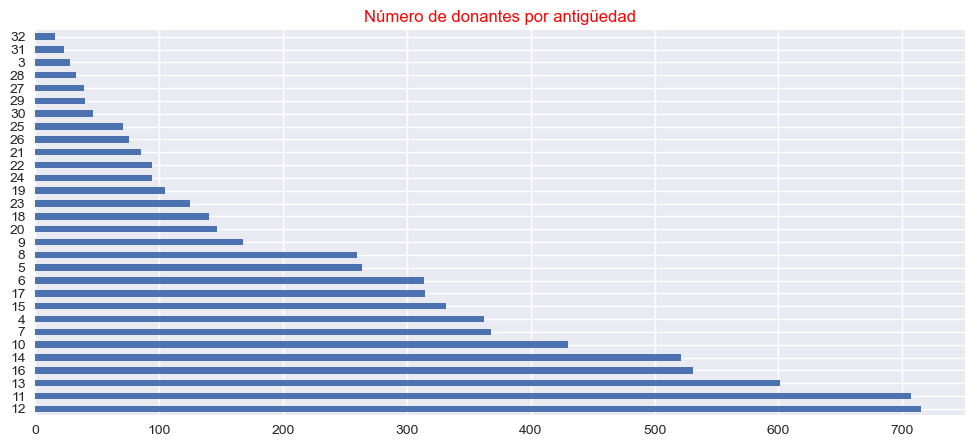

In [22]:
donantes_mayores.antigüedad.value_counts().head(30).plot.barh(figsize=(12,5))
plt.title("Número de donantes por antigüedad",color="red")
plt.show()

In [23]:
#Haciendo un groupby por generos:
agrup_genero = donantes_mayores.groupby('gender',as_index=False).agg({'account_id':'count'})
agrup_genero

,gender,account_id
0,hombre,3205
1,mujer,3877


In [24]:
agrup_genero[agrup_genero['account_id']== max(agrup_genero['account_id'])]

,gender,account_id
1,mujer,3877


3. **Haz un gráfico que muestre el importe total de donativos “Cuotas” por mes y por “recruitment channel”<br>¿En qué mes los captados por teléfono tienen un importe de cuotas mayor?**

In [25]:
#Seleccionando los tipos de regalos que son `Cuotas`:
gifts_cuotas = gifts[gifts['gift_type'] == 'Cuotas']

In [26]:
#Haciendo un inner join:
gifts_cuotas_union= gifts_cuotas.merge(account,how='inner',on= 'account_id')
gifts_cuotas_union.head()

,gift_id,account_id,payment_date,payment_amount,gift_type,frequency,año,mes,date_of_birth,original_recruitment_date,recruitment_channel,gender
0,27132848,3481181,2016-01-01,6.0,Cuotas,Mensual,2016,1,NaT,2004-01-19,web,hombre
1,27264848,3481181,2016-02-01,6.0,Cuotas,Mensual,2016,2,NaT,2004-01-19,web,hombre
2,27401390,3481181,2016-03-01,6.0,Cuotas,Mensual,2016,3,NaT,2004-01-19,web,hombre
3,27543013,3481181,2016-04-01,6.0,Cuotas,Mensual,2016,4,NaT,2004-01-19,web,hombre
4,27683535,3481181,2016-05-01,6.0,Cuotas,Mensual,2016,5,NaT,2004-01-19,web,hombre


In [27]:
#Haciendo un grup_by por 'recruitment_channel' y 'mes':
gifts_cuotas_union_groupby = gifts_cuotas_union.groupby(['recruitment_channel','mes']).agg({'payment_amount':'sum'}).unstack()
gifts_cuotas_union_groupby.head()

payment_amount                                          \
mes                             1         2         3         4         5    
recruitment_channel                                                          
apartado_correos          59585.69  55749.27  56496.36  57000.14  56089.89   
cara_a_cara               18312.61  18639.43  18885.78  19287.18  19620.56   
llamada                   20432.24  19368.24  20508.99  21614.24  20915.06   
otros                       370.16    396.95    370.53    370.53    537.54   
puerta_a_puerta           28593.02  28666.20  30156.20  30567.25  31089.27   

                                                                       \
mes                        6         7         8         9         10   
recruitment_channel                                                     
apartado_correos     57722.80  59284.05  55864.05  56483.62  57526.39   
cara_a_cara          19525.60  20374.18  20251.34  20056.34  20211.55   
llamada              22347.53  23200.80  21750.94  22713.40  23522.91   
otros                  471.12    451.12    447.54    461.12    464.12   
puerta_a_puerta      30728.05  31371.27  30980.36  31027.61  31079.15   

                                         
mes                        11        12  
recruitment_channel                      
apartado_correos     56727.80  59554.73  
cara_a_cara          20097.35  19500.71  
llamada              22096.67  24365.47  
otros                  490.54    464.12  
puerta_a_puerta      30757.49  30566.83

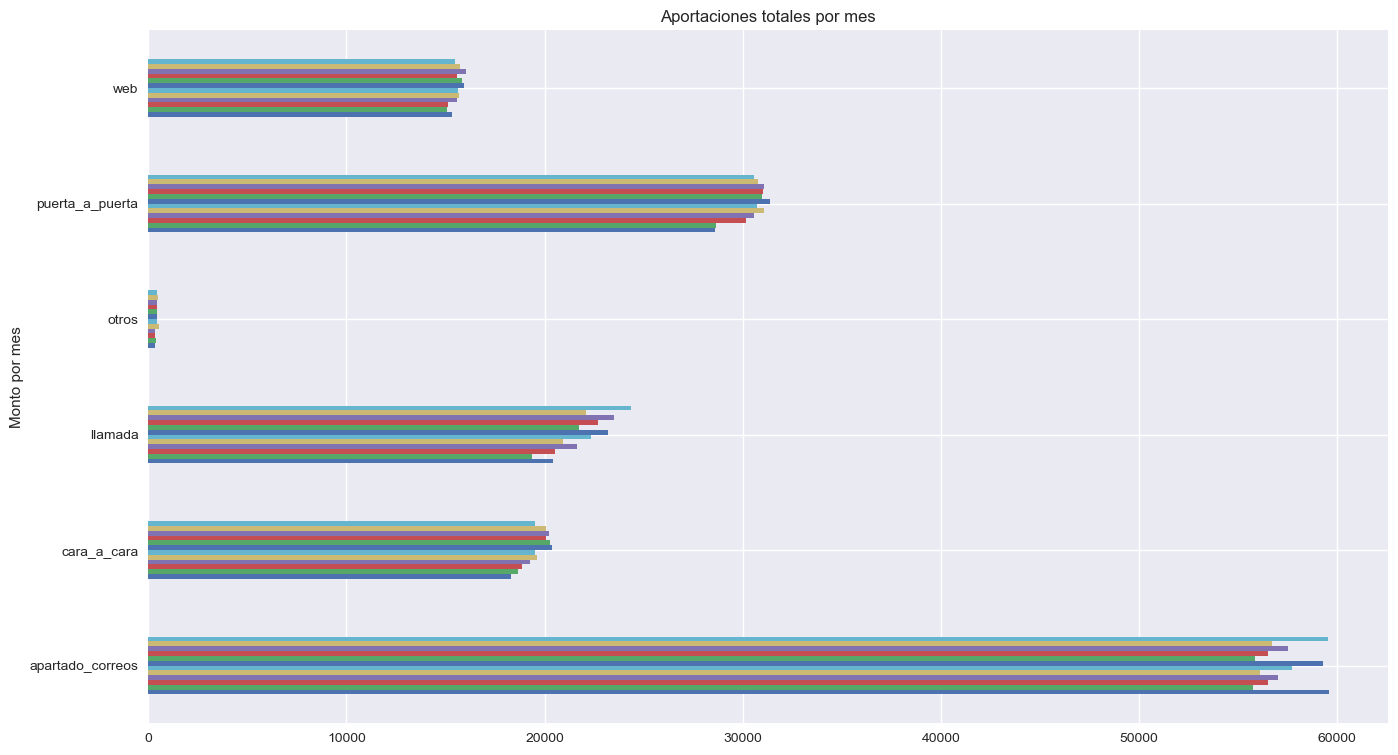

In [28]:
gifts_cuotas_union_groupby.plot.barh(title = 'Aportaciones totales por mes',figsize=(16,9),legend= False)
plt.ylabel('Monto por mes')
plt.grid(True)
plt.style.use('seaborn')
plt.show()

Se registra un mayor importe de donaciones por `llamada` en el mes de diciembre.

<style>
body {
text-align: justify}
4.Si clasificamos la Antigüedad en 4 grupos: los que tienen una antigüedad menor a 1 año “<1”, los que tienen un antigüedad igual o mayor a 1 año y menor a 3, “1_a_3”, los que tienen una antigüedad igual o mayor a 3 e inferior a 5, “3_a_5” y los que tienen una antigüedad mayor o igual a 5, “>5”. (No tener en cuenta NA’s)<br>¿Puedes decir en cuál de estos grupos de antigüedad las mujeres tienen una media de cuota anualizada mayor? ¿Cuál es esa media? (cuota anualizada es la suma de todas las gift_type == “Cuotas” pagadas por cada colaborador durante el año)<br> ¿Dentro de este grupo “ganador”, para que canal de captación (“recruitment_channel”) la cuota anualizada es más alta?¿Cuál es el importe? </style>

4. **Si clasificamos la Antigüedad en 4 grupos: los que tienen una antigüedad menor a 1 año *“<1”*, los que tienen un antigüedad igual o mayor a 1 año y menor a 3, *“1_a_3”*, los que tienen una antigüedad igual o mayor a 3 e inferior a 5, *“3_a_5”* y los que tienen una antigüedad mayor o igual a 5, *“>5”*. (No tener en cuenta NA’s):<br>¿Puedes decir en cuál de estos grupos de antigüedad las mujeres tienen una media de cuota anualizada mayor? <br>¿Cuál es esa media? (cuota anualizada es la suma de todas las `gift_type == “Cuotas”` pagadas por cada colaborador durante el año) <br>¿Dentro de este grupo “ganador”, para que canal de captación (“recruitment_channel”) la cuota anualizada es más alta?¿Cuál es el importe?**

Cogiendo los datos donde `gift_type== Cuotas`:

In [29]:
gifts_cuotas_union=gifts_cuotas_union.dropna(subset="original_recruitment_date")
gifts_cuotas_union=gifts_cuotas_union[gifts_cuotas_union.gift_type =="Cuotas"]
gifts_cuotas_union=gifts_cuotas_union[gifts_cuotas_union.gender=="mujer"]
gifts_cuotas_union["antigüedad"]= refer_time-gifts_cuotas_union.loc[:,'original_recruitment_date'] 
gifts_cuotas_union["antigüedad"]=gifts_cuotas_union.antigüedad.dt.days/365
gifts_cuotas_union["antigüedad"]=gifts_cuotas_union.antigüedad.round(0).astype('int64')

In [30]:
#Borrando la columna año, mes y date_of_birth:
del gifts_cuotas_union['año']
del gifts_cuotas_union['mes']
del gifts_cuotas_union['date_of_birth']

In [31]:
#Añadiendo el año de aportación
gifts_cuotas_union["año_aportacion"]=gifts_cuotas_union.payment_date.dt.year

In [32]:
gifts_cuotas_union.dtypes

gift_id                               int64
account_id                            int64
payment_date                 datetime64[ns]
payment_amount                      float64
gift_type                            object
frequency                            object
original_recruitment_date    datetime64[ns]
recruitment_channel                  object
gender                               object
antigüedad                            int64
año_aportacion                        int64
dtype: object

In [33]:
#Creando la columna que clasifica la antigüedad del donante:
def class_ant(años):
    if años <1:
        return "<1"
    elif años <3:
        return "1<3"
    elif años <5:
        return "3<5"
    else:
        return ">5"
gifts_cuotas_union["grupo_antigüedad"]=gifts_cuotas_union.antigüedad.apply(class_ant)

In [34]:
gifts_cuotas_union.iloc[np.random.randint(0,gifts_cuotas_union.shape[0],10),:]

,gift_id,account_id,payment_date,payment_amount,gift_type,frequency,original_recruitment_date,recruitment_channel,gender,antigüedad,año_aportacion,grupo_antigüedad
41156,28240233,3572826,2016-09-01,12.00,Cuotas,Mensual,2001-10-08,llamada,mujer,15,2016,>5
8104,28189908,3910775,2016-09-01,25.00,Cuotas,Mensual,2009-11-04,puerta_a_puerta,mujer,7,2016,>5
46386,28078546,3453846,2016-08-01,18.00,Cuotas,Mensual,2005-10-19,apartado_correos,mujer,11,2016,>5
27422,27391617,3335851,2016-03-01,20.00,Cuotas,Mensual,2003-04-07,web,mujer,14,2016,>5
44995,28216352,3649174,2016-09-01,30.00,Cuotas,Mensual,2006-05-26,apartado_correos,mujer,11,2016,>5
69509,27320697,3315695,2016-03-01,10.00,Cuotas,Mensual,1989-04-01,apartado_correos,mujer,28,2016,>5
47456,28212346,3807820,2016-09-01,10.00,Cuotas,Mensual,2005-11-02,apartado_correos,mujer,11,2016,>5
86024,27150840,4353184,2016-02-01,15.00,Cuotas,Mensual,2014-05-12,puerta_a_puerta,mujer,3,2016,3<5
75847,28569812,3941609,2016-12-01,3.01,Cuotas,Mensual,2000-07-13,apartado_correos,mujer,16,2016,>5
9495,27640718,3760376,2016-05-01,12.00,Cuotas,Mensual,2011-03-15,puerta_a_puerta,mujer,6,2016,>5


In [35]:
#Agrupando la aportación anual en cada contribuyente:
cols_groups=["account_id","año_aportacion","grupo_antigüedad"]
cuota_anual_mujer=gifts_cuotas_union.groupby(cols_groups,as_index=False).agg({"payment_amount":"sum"})
cuota_anual_mujer.iloc[np.random.randint(0,cuota_anual_mujer.shape[0],10),:]

,account_id,año_aportacion,grupo_antigüedad,payment_amount
1773,3570541,2016,>5,144.00
4977,4667519,2016,1<3,84.00
3559,4199531,2016,>5,240.00
3852,4299213,2016,3<5,180.00
3160,4055094,2016,>5,72.12
4822,4535230,2016,1<3,210.00
50,3017069,2016,>5,480.00
4113,4346427,2016,3<5,180.00
4759,4513628,2016,1<3,165.00
218,3082772,2016,>5,360.00


In [36]:
#Calculando la media anual:
cuotal_media_mujer=cuota_anual_mujer.groupby("grupo_antigüedad",as_index=False).agg({"payment_amount":"mean"})
cuotal_media_mujer

,grupo_antigüedad,payment_amount
0,1<3,139.882247
1,3<5,154.714758
2,>5,179.193288


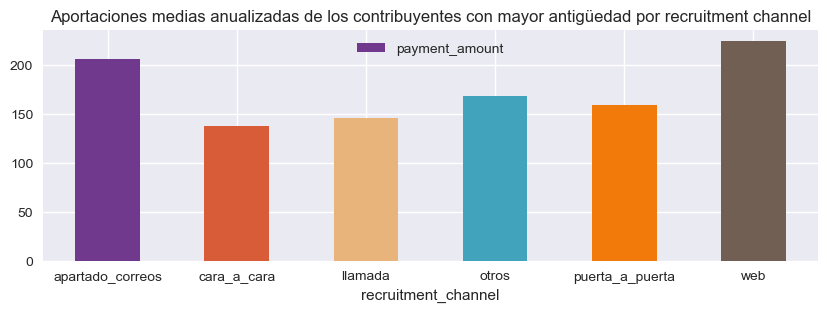

In [37]:
#Filtrando por el grupo de más de 5 años de antigüedad:
grupo_antigüo=gifts_cuotas_union[gifts_cuotas_union.grupo_antigüedad==">5"]
#Sacando la couta anual 
cols_groups2=["account_id","año_aportacion","recruitment_channel"]
cuota_anual_mujer_ant=grupo_antigüo.groupby(cols_groups2,as_index=False).agg({"payment_amount":"sum"})
#Sacando la cuota anual media por recruitment channel:
cuota_media_mujer_ant=cuota_anual_mujer_ant.groupby("recruitment_channel",as_index=False).agg({"payment_amount":"mean"})
cuota_media_mujer_ant.plot.bar(x="recruitment_channel",y="payment_amount",color=colores[:6],figsize=(10,3),rot=0)
plt.title("Aportaciones medias anualizadas de los contribuyentes con mayor antigüedad por recruitment channel")
plt.show()

5. **Crea unos diagramas de caja (boxplot) con la cuota anualizada (ten en cuenta solo las cuotas menores de 500 eur) por canal de captación (recruitment_channel) y en función de los resultados, teniendo en cuenta que queremos maximizar la cuota anualizada de los donativos, ¿Por qué canal/es se debería apostar?**

In [38]:
#De la tabla 'gifts_cuotas_union',haciendo un groupby por 'recruitment_channel' y por 'account_id':
gifts_cuotas_union_recruitmentchannel_accountid = gifts_cuotas_union.groupby(['recruitment_channel','account_id']).agg({'payment_amount':'sum'})

In [39]:
#Haciendo un filtro de las cuotas menores a 500 euros:
gifts_cuotas_union_recruitmentchannel_accountid_menores=  gifts_cuotas_union_recruitmentchannel_accountid[gifts_cuotas_union_recruitmentchannel_accountid['payment_amount']<500 ] 

In [40]:
gifts_cuotas_union_recruitmentchannel_accountid_menores.head()

payment_amount
recruitment_channel account_id                
apartado_correos    3000336             300.00
                    3003613             195.15
                    3004241             372.00
                    3004453             180.00
                    3004956             384.00

In [41]:
#Haciendo un groupby de nuevo pero sólo por 'recruitment_channel':
gifts_cuotas_union_recruitmentchannel_accountid_menores1= gifts_cuotas_union_recruitmentchannel_accountid_menores.groupby('recruitment_channel')

In [42]:
gifts_cuotas_union_recruitmentchannel_accountid_menores1.head()

payment_amount
recruitment_channel account_id                
apartado_correos    3000336             300.00
                    3003613             195.15
                    3004241             372.00
                    3004453             180.00
                    3004956             384.00
cara_a_cara         3006722             208.80
                    3008948             144.00
                    3009308             120.00
                    3016464             120.00
                    3022818              60.00
llamada             3004619              84.00
                    3005986              60.00
                    3007267             180.00
                    3007424              70.00
                    3007968             264.00
otros               3253393             216.36
                    3495171              50.00
                    3507252             216.00
                    3602743             120.00
                    3681120             216.36
puerta_a_puerta     3023389             120.00
                    3034208             130.68
                    3039878             180.00
                    3050502             150.00
                    3079896             240.00
web                 3000610             240.00
                    3004322             174.48
                    3005974             236.00
                    3006242             120.00
                    3006958              72.00

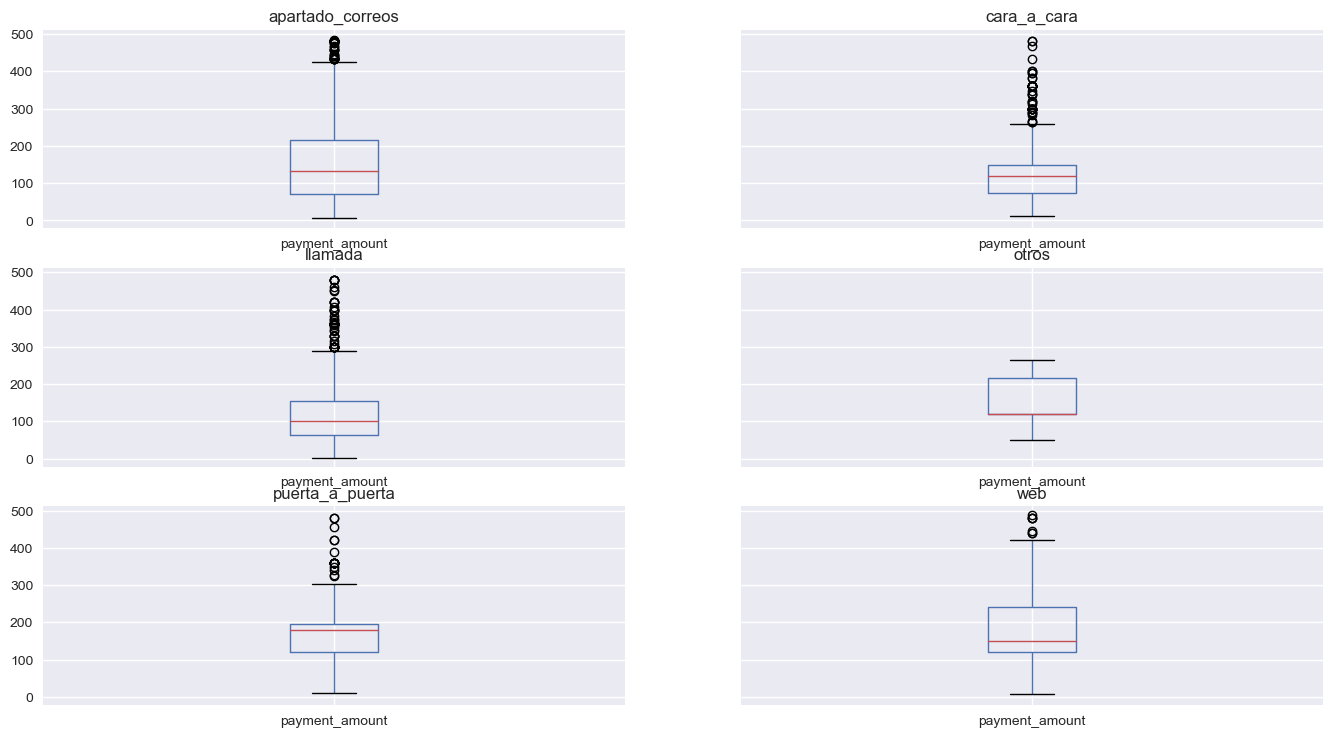

In [43]:
#Graficando los plots:
gifts_cuotas_union_recruitmentchannel_accountid_menores1.boxplot(figsize=(16,9))
plt.show()

Apostaría por `apartados_correos`, la `web` y `puerta_a_puerta`